I will be using data from AirBNB's Boston dataset to try to gain an understanding of what it takes to be a successful
AirBNB host in the Boston market. Specifically, I will answer the following questions.

1. What neighborhoods are the highest grossing units in?
2. What type of property is most popular to rent?
3. Can we predict appropriate rental prices in the Boston market?

In [14]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy import stats
import math

# output style settings
desired_width=320
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 50)
plt.style.use(['dark_background'])

# Gather
The AirBNB datasets offer four text files for analysis - listings, neighborhoods, reviews, and calendar. We will explore
each of these datasets.

In [15]:
# gather, assess, clean, analyze, model, visualize
# gather the data into pandas dataframes for further analysis

# numerical data has to be read in as strings for further preprocessing due to the formatting.
df_listings = pd.read_csv('data/listings_boston.csv', dtype={"price": str,
                                                             "weekly_price": str,
                                                             "monthly_price": str,
                                                             "security_deposit": str,
                                                             "cleaning_fee": str,
                                                             "extra_people": str,
                                                             "host_response_rate": str})

df_neighborhoods = pd.read_csv('data/neighbourhoods_boston.csv')
df_reviews = pd.read_csv('data/reviews_boston.csv')
df_calendar = pd.read_csv('data/calendar_boston.csv', dtype={"price": str, "adjusted_price": str})

# Assess
Convert the numerical data into a numerical format and analyze basic properties of the data.

In [16]:
# clean numerical data by converting them to numeric data types
df_listings.loc[:, "price"] = df_listings["price"].str.replace(',', '').str.replace('$', '').astype('float')
df_listings.loc[:, "weekly_price"] = df_listings["weekly_price"].str.replace(',', '').str.replace('$', '').astype('float')
df_listings.loc[:, "monthly_price"] = df_listings["monthly_price"].str.replace(',', '').str.replace('$', '').astype('float')
df_listings.loc[:, "security_deposit"] = df_listings["security_deposit"].str.replace(',', '').str.replace('$', '').astype('float')
df_listings.loc[:, "cleaning_fee"] = df_listings["cleaning_fee"].str.replace(',', '').str.replace('$', '').astype('float')
df_listings.loc[:, "extra_people"] = df_listings["extra_people"].str.replace(',', '').str.replace('$', '').astype('float')
df_listings["host_response_rate"].fillna("0", inplace=True)
df_listings.loc[:, "host_response_rate"] = df_listings["host_response_rate"].str.replace('%', '').astype('int')

df_calendar.loc[:, "price"] = df_calendar["price"].str.replace(',', '').str.replace('$', '').astype('float')
df_calendar.loc[:, "adjusted_price"] = df_calendar["adjusted_price"].str.replace(',', '').str.replace('$', '').astype('float')

View summary statistics of the numerical data that has been loaded.

In [17]:
df_listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,...,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.155000e+03,6.155000e+03,0.0,0.0,0.0,6.155000e+03,6155.000000,0.0,6153.000000,6153.000000,0.0,6155.000000,6155.000000,6155.000000,6150.000000,6149.000000,6152.000000,98.000000,6155.000000,527.000000,529.000000,4280.000000,5176.000000,6155.000000,6155.000000,...,6155.000000,6.155000e+03,6.155000e+03,6155.000000,6.155000e+03,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,6155.000000,4856.000000,4851.000000,4853.000000,4849.000000,4854.000000,4849.000000,4849.000000,0.0,0.0,6155.000000,6155.000000,6155.000000,6155.000000,4911.000000
mean,1.879144e+07,2.019021e+13,NaN,NaN,NaN,5.998043e+07,75.747847,NaN,152.358524,152.358524,NaN,42.339234,-71.083608,3.407311,1.268049,1.351114,1.844603,745.010204,206.795126,936.624288,3684.516068,196.570561,73.192427,1.708855,11.451990,...,8.373193,1.698364e+04,1.698551e+04,6.863542,1.698545e+04,12.416897,27.448903,42.763444,141.981803,32.385053,14.891795,93.356672,9.596372,9.466516,9.735203,9.681706,9.545886,9.300474,NaN,NaN,35.479285,33.577417,1.840780,0.061089,1.976685
std,8.802758e+06,0.000000e+00,NaN,NaN,NaN,6.481161e+07,40.001651,NaN,372.054375,372.054375,NaN,0.025676,0.032545,2.175956,0.511118,0.926631,1.355363,443.027576,375.423899,662.629968,3038.009542,317.905589,48.814768,1.388253,20.339803,...,47.909166,1.274626e+06,1.274626e+06,34.231379,1.274626e+06,11.535227,22.836267,33.768567,128.051888,56.750744,22.285361,8.462533,0.837977,0.904077,0.746278,0.807092,0.777950,0.891518,NaN,NaN,73.147833,73.626063,4.079204,0.540380,2.100526
min,3.781000e+03,2.019021e+13,NaN,NaN,NaN,4.804000e+03,0.000000,NaN,0.000000,0.000000,NaN,42.235760,-71.173506,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,175.000000,85.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.278680e+07,2.019021e+13,NaN,NaN,NaN,1.180787e+07,76.000000,NaN,1.000000,1.000000,NaN,42.328336,-71.103906,2.000000,1.000000,1.000000,1.000000,460.000000,83.000000,482.000000,1550.000000,0.000000,35.000000,1.000000,0.000000,...,1.000000,1.000000e+02,1.070000e+02,1.000000,1.070000e+02,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.380000
50%,2.043183e+07,2.019021e+13,NaN,NaN,NaN,3.028359e+07,99.000000,NaN,4.000000,4.000000,NaN,42.345009,-71.076860,3.000000,1.000000,1.000000,1.000000,600.000000,150.000000,750.000000,3000.000000,100.000000,70.000000,1.000000,0.000000,...,2.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,11.000000,29.000000,47.000000,102.000000,9.000000,4.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,3.000000,1.000000,0.000000,0.000000,1.190000
75%,2.601302e+07,2.019021e+13,NaN,NaN,NaN,9.545940e+07,100.000000,NaN,38.000000,38.000000,NaN,42.355151,-71.061551,4.000000,1.500000,2.000000,2.000000,1000.000000,2

In [18]:
df_neighborhoods.describe()

,neighbourhood_group
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [19]:
df_reviews.describe()

,listing_id,id,reviewer_id
count,1.993300e+05,1.993300e+05,1.993300e+05
mean,1.258614e+07,2.083162e+08,7.268836e+07
std,8.224075e+06,1.076633e+08,6.192693e+07
min,3.781000e+03,1.021000e+03,1.000000e+00
25%,4.924009e+06,1.154105e+08,2.073139e+07
50%,1.339342e+07,2.135150e+08,5.409988e+07
75%,1.930943e+07,3.024042e+08,1.167099e+08
max,3.216361e+07,4.097567e+08,2.414605e+08


Based on these outputs, I have observed:

* The neighborhoods file is basically empty and can be ignored
* the review data is full of unstructured review data and would have to have some sort of nlp model applied first in
order to generate data that can be regressed on.
* The listings data contains descriptive information about the rentals.
* The calendar data has price information and how it varies over time.

The listings file is the data with the most readibly modelable data and I have decided to focus on that data to answer the questions

How complete is the listing data?

In [20]:
for col in df_listings.columns:
    print(col, ':', df_listings[col].dropna().shape[0] / df_listings[col].shape[0])

id : 1.0
listing_url : 1.0
scrape_id : 1.0
last_scraped : 1.0
name : 0.9998375304630381
summary : 0.9675060926076361
space : 0.7723801787164907
description : 0.9920389926888709
experiences_offered : 1.0
neighborhood_overview : 0.682859463850528
notes : 0.602761982128351
transit : 0.7091795288383428
access : 0.5998375304630382
interaction : 0.6646628757108042
house_rules : 0.679285134037368
thumbnail_url : 0.0
medium_url : 0.0
picture_url : 1.0
xl_picture_url : 0.0
host_id : 1.0
host_url : 1.0
host_name : 0.9996750609260764
host_since : 0.9996750609260764
host_location : 0.9977254264825345
host_about : 0.6709991876523151
host_response_time : 0.7988627132412672
host_response_rate : 1.0
host_acceptance_rate : 0.0
host_is_superhost : 0.9996750609260764
host_thumbnail_url : 0.9996750609260764
host_picture_url : 0.9996750609260764
host_neighbourhood : 0.8942323314378554
host_listings_count : 0.9996750609260764
host_total_listings_count : 0.9996750609260764
host_verifications : 1.0
host_has_p

We will have to deal with any variables with missing data before introducing them into the regression.

Before we try to apply a regression analysis, we should check to see if there is any collinearity that can cause
stability issues in the regression.

<AxesSubplot:>

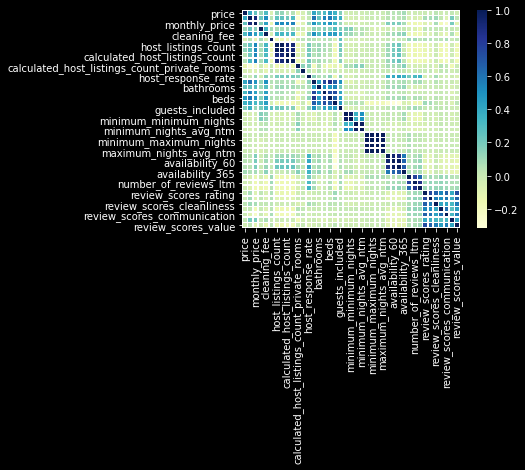

In [21]:
num_vars = ["price",
            "weekly_price",
            "monthly_price",
            "security_deposit",
            "cleaning_fee",
            "extra_people",
            'host_listings_count',
            'host_total_listings_count',
            'calculated_host_listings_count',
            'calculated_host_listings_count_entire_homes',
            'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms',
            'host_response_rate',
            'accommodates',
            'bathrooms',
            'bedrooms',
            'beds',
            'square_feet',
            'guests_included',
            'minimum_nights',
            'minimum_minimum_nights',
            'maximum_minimum_nights',
            'minimum_nights_avg_ntm',
            'maximum_nights',
            'minimum_maximum_nights',
            'maximum_maximum_nights',
            'maximum_nights_avg_ntm',
            'availability_30',
            'availability_60',
            'availability_90',
            'availability_365',
            'number_of_reviews',
            'number_of_reviews_ltm',
            'reviews_per_month',
            'review_scores_rating',
            'review_scores_accuracy',
            'review_scores_cleanliness',
            'review_scores_checkin',
            'review_scores_communication',
            'review_scores_location',
            'review_scores_value'
            ]
sns.heatmap(df_listings[num_vars].corr(), annot=False, fmt=".2f", cmap="YlGnBu", linewidths=.5, square=True)

Correlation matrix supports some clearly distinct categories of data
* Pricing: price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people
* Host: host_listings_count, host_total_listings_count, calculated_host_listings_count,
calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms,
calculated_host_listings_count_shared_rooms
* Property: accommodates, bathrooms, bedrooms, beds, square_feet, guests_included, minimum_nights,
minimum_minimum_nights, maximum_minimum_nights, minimum_nights_avg_ntm, maximum_nights, minimum_maximum_nights,
maximum_maximum_nights, maximum_nights_avg_ntm
* Availability: availability_30, availability_60, availability_90, availability_365
* Reviews: number_of_reviews, number_of_reviews_ltm, reviews_per_month, review_scores_rating,
review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location,
review_scores_value

We should be careful when selecting more than one variable from each category or pick a representative variable from
each group.

What kind of data is in the categorical variables?

In [22]:
cat_vars = ["space",
            "description",
            "experiences_offered",
            "neighborhood_overview",
            "notes",
            "transit",
            "access",
            "interaction",
            "house_rules",
            "host_name",
            "host_since",
            "host_location",
            "host_about",
            "host_response_time",
            "host_acceptance_rate",
            "host_is_superhost",
            "host_neighbourhood",
            "host_verifications",
            "host_has_profile_pic",
            "host_identity_verified",
            "street",
            "neighbourhood",
            "neighbourhood_cleansed",
            "market",
            "smart_location",
            "is_location_exact",
            "property_type",
            "room_type",
            "bed_type",
            "amenities",
            "extra_people",
            "calendar_updated",
            "has_availability",
            "calendar_last_scraped",
            "requires_license",
            "instant_bookable",
            "is_business_travel_ready",
            "cancellation_policy",
            "require_guest_profile_picture",
            "require_guest_phone_verification"]

for col in df_listings[cat_vars].columns:
    print(df_listings[[col, 'price']].groupby([col]).mean())
    print(df_listings[col].value_counts())

                                                    price
space                                                    
"PARKING IF AVAILABLE " is $25.00 per stay if l...  240.0
"PARKING SPACE IF AVAILABLE " is  $25.00 per st...  125.0
"PARKING SPACE IF AVAILABLE" is in front of hou...  125.0
#202 Lotus The Lotus apartment has all new hard...  325.0
$20 late check out/early check in fee. However,...   79.0
...                                                   ...
可以使用卫生间厨房客厅等公用空间                                     50.0
在JFK/UMass 站可坐通勤车到UMass Boston university ,long...  170.0
在市中心,独立的二房一厅一厨一厕,全部新装修,非常干净整洁｡                      205.0
来波士顿旅行的情侣或单身游客,                                      39.0
近地铁站,市中心,机场等                                         62.0

[3495 rows x 1 columns]
Every booking is instantly confirmed. Every call or message is answered within minutes. Every home is equipped with crisp linens, high-speed Wi-Fi, and kitchen and bath essentials—everything you need for an exceptional st

# What neighborhoods are the highest grossing units in?
Back Bay has the highest average rental prices.
# What type of property is most popular to rent?
Renting an entire home or apartment is the most popular unit type

In [23]:
print(pd.crosstab(df_listings['neighbourhood'], df_listings['room_type']))

room_type           Entire home/apt  Private room  Shared room
neighbourhood                                                 
Allston-Brighton                287           363            9
Back Bay                        460            63            1
Beacon Hill                     243            30            1
Brookline                         0             3            0
Cambridge                         1             3            0
Charlestown                      99            42            0
Chestnut Hill                     3             0            0
Chinatown                       165            18            2
Dorchester                      144           367            4
Downtown                         18             1            1
Downtown Crossing               106             3            0
East Boston                     168           135            1
Fenway/Kenmore                  362            63            5
Financial District               38            13      

Explore the target variable of price

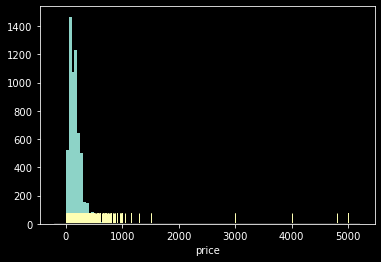

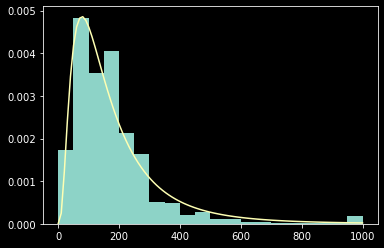

In [24]:
target = df_listings['price'].copy()
plt.hist(target, bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
sns.distplot(target, fit=stats.lognorm, kde=False, rug=True)
plt.show()
linspace = np.linspace(0, 1000, 100)
pdf_lognorm = stats.lognorm.pdf(linspace, shape, loc, scale)
plt.hist(target, density=True, bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
plt.plot(linspace, pdf_lognorm, label="lognorm")
plt.show()

# Clean
Prepare the data for modeling by:
* Drop rows with 0 price and prices above 2950 considered outliers
* Create a log transformed target variable from price
* Create predictor matrix from selected columns that:
    * Deals with missing values
    * Create dummy variables for selected categorical variables

In [25]:
# Drop rows with 0 price
df_listings = df_listings[df_listings.price > 0]
df_listings = df_listings[df_listings.price < 2950]

# Create y
y = df_listings['price'].apply(math.log)

# Select columns for X
potential_vars = ['host_listings_count',
                 'calculated_host_listings_count_private_rooms',
                 'neighbourhood_cleansed',
                 'room_type',
                 'property_type',
                 'beds',
                 'availability_365',
                 'number_of_reviews',
                 'neighborhood_overview',
                 'space',
                 'notes',
                 'transit',
                 'access',
                 'interaction',
                 'house_rules',
                 'host_about',
                 'host_is_superhost',
                 'host_has_profile_pic',
                 'host_identity_verified',
                 'instant_bookable',
                 'require_guest_profile_picture',
                 'require_guest_phone_verification',]

bool_vars = ['host_is_superhost',
             'host_has_profile_pic',
             'host_identity_verified',
             'instant_bookable',
             'require_guest_profile_picture',
             'require_guest_phone_verification']

free_text_vars = ['neighborhood_overview',
                  'space',
                  'notes',
                  'transit',
                  'access',
                  'interaction',
                  'house_rules',
                  'host_about']

df_listings = df_listings[potential_vars]
# Deal with missing values
df_listings['number_of_reviews'].fillna(0, inplace=True)
df_listings[bool_vars].fillna('f', inplace=True)
df_listings[free_text_vars].fillna('', inplace=True)

def translate_bool(col):
    for index, value in col.iteritems():
        col[index] = 1 if value == 't' else 0
    return col

def create_bool(col):
    for index, value in col.iteritems():
        col[index] = 0 if value == '' else 1
    return col

fill_mean = lambda col: col.fillna(col.mean())
num_vars = df_listings.select_dtypes(include=['int', 'float']).columns
df_listings[num_vars] = df_listings[num_vars].apply(fill_mean, axis=0)
df_listings[bool_vars] = df_listings[bool_vars].apply(translate_bool, axis=0)
df_listings[bool_vars].dtype = int
df_listings[free_text_vars] = df_listings[free_text_vars].apply(create_bool, axis=0)
df_listings[free_text_vars].dtype = int
# Dummy the categorical variables
cat_vars = ['neighbourhood_cleansed', 'room_type', 'property_type']
for var in cat_vars:
    # for each cat add dummy var, drop original column
    df_listings = pd.concat([df_listings.drop(var, axis=1), pd.get_dummies(df_listings[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

X = df_listings

C:\ProgramData\Anaconda3\envs\test\lib\site-packages\pandas\core\frame.py:4316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


# Model - Can we predict appropriate rental prices in the Boston market?

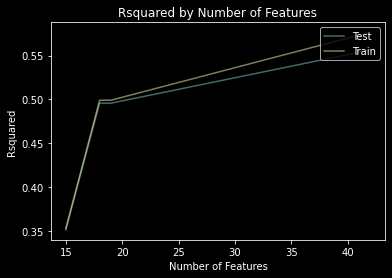

[('host_listings_count', 1.000319208085532), ('calculated_host_listings_count_private_rooms', 0.9836365685095317), ('beds', 1.1714040702423312), ('availability_365', 1.0002870898616636), ('number_of_reviews', 0.9993353514585487), ('neighborhood_overview', 0.0), ('space', inf), ('notes', inf), ('transit', inf), ('access', 0.0), ('interaction', inf), ('house_rules', inf), ('host_about', 0.0), ('host_is_superhost', 1.03196552648108), ('host_has_profile_pic', 0.970147656116507), ('host_identity_verified', 0.9806557528266198), ('instant_bookable', 0.9653313062994568), ('require_guest_profile_picture', 1.071065936741276), ('require_guest_phone_verification', 1.201687894428989), ('neighbourhood_cleansed_Back Bay', 1.7871139115201304), ('neighbourhood_cleansed_Beacon Hill', 1.3249105347914705), ('neighbourhood_cleansed_Brighton', 0.8887758943862158), ('neighbourhood_cleansed_Charlestown', 1.3213264362756887), ('neighbourhood_cleansed_Chinatown', 1.4244700367965657), ('neighbourhood_cleansed_Do

<ipython-input-28-4fe91671be29>:64: RuntimeWarning: overflow encountered in exp
  print(list(zip(X_train.columns, np.exp(lm_model.coef_))))


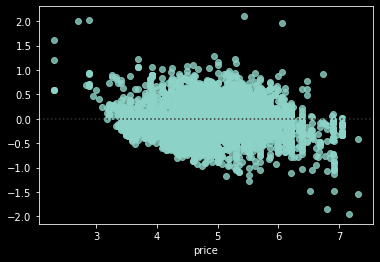

In [28]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

selected_vars=X_train.columns
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, [100, 1000, 2000, 3000], plot=True)
print(list(zip(X_train.columns, np.exp(lm_model.coef_))))
print(r2_scores_train, r2_scores_test)
lm_model = LinearRegression(normalize=False)
X = X[selected_vars]
lm_model.fit(X, y)
y_preds = lm_model.predict(X)

print(list(zip(X.columns, np.exp(lm_model.coef_))))
print(r2_score(y, y_preds))
sns.residplot(y, y_preds)
plt.show()

This basic model can capture about 60% of the variability in price. The residual plot shows that there is some room for
improvement at the extreme ends of the price variable, where low prices are over predicted and higher prices are
under predicted.